# Two layer QG using pyqg

In [1]:
%matplotlib widget
anim_dir = 'animations/'

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation, writers, PillowWriter

# %matplotlib inline
import pyqg
import cmocean
from copy import copy

### Initialize and run

In [34]:
L =  1000.e3     # length scale of box    [m]
Ld = 15.e3       # deformation scale      [m]
kd = 1./Ld       # deformation wavenumber [m^-1]
Nx = 64          # number of grid points

H1 = 500.        # layer 1 thickness  [m]
H2 = 1750.       # layer 2
H3 = 1750.       # layer 3

U1 = 0.05          # layer 1 zonal velocity [m/s]
U2 = 0.025         # layer 2
U3 = 0.00          # layer 3

rho1 = 1025.
rho2 = 1025.275
rho3 = 1025.640

rek = 1.e-7       # linear bottom drag coeff.  [s^-1]
f0  = 0.0001236812857687059 # coriolis param [s^-1]
beta = 1.2130692965249345e-11 # planetary vorticity gradient [m^-1 s^-1]

Ti = Ld/(abs(U1))  # estimate of most unstable e-folding time scale [s]
dt = Ti/200.   # time-step [s]
tmax = 120*Ti      # simulation time [s]

In [35]:
print(Ld)
print(dt)
print(Ti)
print(tmax)

15000.0
1500.0
300000.0
36000000.0


In [36]:
m = pyqg.LayeredModel(nx=Nx, nz=3, U = [U1,U2,U3],V = [0.,0.,0.],L=L,f=f0,beta=beta,
                         H = [H1,H2,H3], rho=[rho1,rho2,rho3],rek=rek,
                        dt=dt,tmax=tmax, twrite=5000, tavestart=Ti*10)

INFO:  Logger initialized


Text(0, 0.5, 'z [m]')

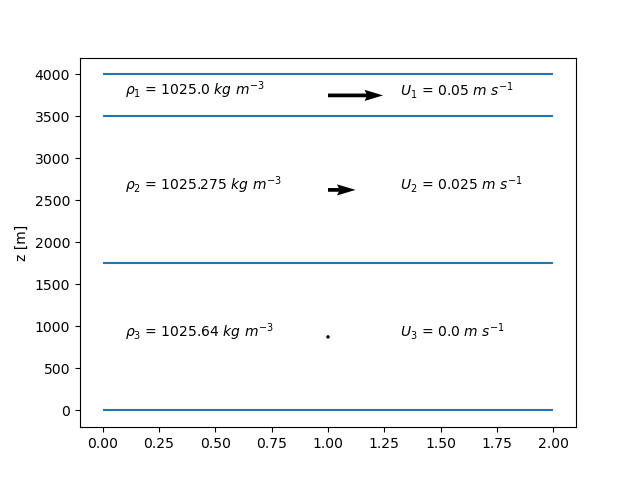

In [78]:
fig = plt.figure()
ax=plt.axes()
ax.quiver(np.ones(m.Ubg.shape), [(H1+2*H2+2*H3)/2,(H2+2*H3)/2, H3/2], m.Ubg, np.zeros(m.Ubg.shape))
ax.hlines([0,H3,H2+H3,H1+H2+H3],xmin=0, xmax=2)

ax.text(0.1, H3/2, fr'$\rho_3$ = {rho3} $kg~m^{{{-3}}}$')
ax.text(0.1, (H2+2*H3)/2, fr'$\rho_2$ = {rho2} $kg~m^{{{-3}}}$')
ax.text(0.1, (H1+2*H2+2*H3)/2, fr'$\rho_1$ = {rho1} $kg~m^{{{-3}}}$')

ax.text(1.32, H3/2, fr'$U_3$ = {U3} $m~s^{{{-1}}}$')
ax.text(1.32, (H2+2*H3)/2, fr'$U_2$ = {U2} $m~s^{{{-1}}}$')
ax.text(1.32, (H1+2*H2+2*H3)/2, fr'$U_1$ = {U1} $m~s^{{{-1}}}$')

# ax.set_xlabel('x [km]')
ax.set_ylabel('z [m]')

In [38]:
# year = 24*60*60*360. # number of seconds in a year
# hour = 3600.         # number of seconds in an hour
# m = pyqg.QGModel(dt=dt,tmax=tmax)
# m.run()

In [39]:
sig = 1.e-7
qi = sig*np.vstack([np.random.randn(m.nx,m.ny)[np.newaxis,],
                    np.random.randn(m.nx,m.ny)[np.newaxis,],
                    np.random.randn(m.nx,m.ny)[np.newaxis,]])
m.set_q(qi)

In [40]:
u_t = m.ufull[np.newaxis, :]
v_t = m.vfull[np.newaxis, :]
PV = m.q[np.newaxis, :] + (np.vstack((np.tile(m.Qy[0],(1,64,64)),np.tile(m.Qy[1],(1,64,64)),np.tile(m.Qy[2],(1,64,64)))) * m.y)[np.newaxis,:]
for _ in m.run_with_snapshots(tsnapstart=0, tsnapint=int(tmax/200)):
    u_t = np.vstack((u_t, m.ufull[np.newaxis, :]))
    v_t = np.vstack((v_t, m.vfull[np.newaxis, :]))
    PV = np.vstack((PV, m.q[np.newaxis, :] + np.vstack((np.tile(m.Qy[0],(1,64,64)),np.tile(m.Qy[1],(1,64,64)),np.tile(m.Qy[2],(1,64,64)))) * m.y))
    print(u_t.shape)

(2, 3, 64, 64)
(3, 3, 64, 64)
(4, 3, 64, 64)
(5, 3, 64, 64)
(6, 3, 64, 64)
(7, 3, 64, 64)
(8, 3, 64, 64)
(9, 3, 64, 64)
(10, 3, 64, 64)
(11, 3, 64, 64)
(12, 3, 64, 64)
(13, 3, 64, 64)
(14, 3, 64, 64)
(15, 3, 64, 64)
(16, 3, 64, 64)
(17, 3, 64, 64)
(18, 3, 64, 64)
(19, 3, 64, 64)
(20, 3, 64, 64)
(21, 3, 64, 64)
(22, 3, 64, 64)
(23, 3, 64, 64)
(24, 3, 64, 64)
(25, 3, 64, 64)
(26, 3, 64, 64)
(27, 3, 64, 64)
(28, 3, 64, 64)
(29, 3, 64, 64)
(30, 3, 64, 64)
(31, 3, 64, 64)
(32, 3, 64, 64)
(33, 3, 64, 64)
(34, 3, 64, 64)
(35, 3, 64, 64)
(36, 3, 64, 64)
(37, 3, 64, 64)
(38, 3, 64, 64)
(39, 3, 64, 64)
(40, 3, 64, 64)


INFO: Step: 5000, Time: 7.50e+06, KE: 2.58e-06, CFL: 0.005


(41, 3, 64, 64)
(42, 3, 64, 64)
(43, 3, 64, 64)
(44, 3, 64, 64)
(45, 3, 64, 64)
(46, 3, 64, 64)
(47, 3, 64, 64)
(48, 3, 64, 64)
(49, 3, 64, 64)
(50, 3, 64, 64)
(51, 3, 64, 64)
(52, 3, 64, 64)
(53, 3, 64, 64)
(54, 3, 64, 64)
(55, 3, 64, 64)
(56, 3, 64, 64)
(57, 3, 64, 64)
(58, 3, 64, 64)
(59, 3, 64, 64)
(60, 3, 64, 64)
(61, 3, 64, 64)
(62, 3, 64, 64)
(63, 3, 64, 64)
(64, 3, 64, 64)
(65, 3, 64, 64)
(66, 3, 64, 64)
(67, 3, 64, 64)
(68, 3, 64, 64)
(69, 3, 64, 64)
(70, 3, 64, 64)
(71, 3, 64, 64)
(72, 3, 64, 64)
(73, 3, 64, 64)
(74, 3, 64, 64)
(75, 3, 64, 64)
(76, 3, 64, 64)
(77, 3, 64, 64)
(78, 3, 64, 64)
(79, 3, 64, 64)
(80, 3, 64, 64)
(81, 3, 64, 64)
(82, 3, 64, 64)
(83, 3, 64, 64)


INFO: Step: 10000, Time: 1.50e+07, KE: 1.70e-04, CFL: 0.010


(84, 3, 64, 64)
(85, 3, 64, 64)
(86, 3, 64, 64)
(87, 3, 64, 64)
(88, 3, 64, 64)
(89, 3, 64, 64)
(90, 3, 64, 64)
(91, 3, 64, 64)
(92, 3, 64, 64)
(93, 3, 64, 64)
(94, 3, 64, 64)
(95, 3, 64, 64)
(96, 3, 64, 64)
(97, 3, 64, 64)
(98, 3, 64, 64)
(99, 3, 64, 64)
(100, 3, 64, 64)
(101, 3, 64, 64)
(102, 3, 64, 64)
(103, 3, 64, 64)
(104, 3, 64, 64)
(105, 3, 64, 64)
(106, 3, 64, 64)
(107, 3, 64, 64)
(108, 3, 64, 64)
(109, 3, 64, 64)
(110, 3, 64, 64)
(111, 3, 64, 64)
(112, 3, 64, 64)
(113, 3, 64, 64)
(114, 3, 64, 64)
(115, 3, 64, 64)
(116, 3, 64, 64)
(117, 3, 64, 64)
(118, 3, 64, 64)
(119, 3, 64, 64)
(120, 3, 64, 64)
(121, 3, 64, 64)
(122, 3, 64, 64)
(123, 3, 64, 64)


INFO: Step: 15000, Time: 2.25e+07, KE: 5.09e-03, CFL: 0.050


(124, 3, 64, 64)
(125, 3, 64, 64)
(126, 3, 64, 64)
(127, 3, 64, 64)
(128, 3, 64, 64)
(129, 3, 64, 64)
(130, 3, 64, 64)
(131, 3, 64, 64)
(132, 3, 64, 64)
(133, 3, 64, 64)
(134, 3, 64, 64)
(135, 3, 64, 64)
(136, 3, 64, 64)
(137, 3, 64, 64)
(138, 3, 64, 64)
(139, 3, 64, 64)
(140, 3, 64, 64)
(141, 3, 64, 64)
(142, 3, 64, 64)
(143, 3, 64, 64)
(144, 3, 64, 64)
(145, 3, 64, 64)
(146, 3, 64, 64)
(147, 3, 64, 64)
(148, 3, 64, 64)
(149, 3, 64, 64)
(150, 3, 64, 64)
(151, 3, 64, 64)
(152, 3, 64, 64)
(153, 3, 64, 64)
(154, 3, 64, 64)
(155, 3, 64, 64)
(156, 3, 64, 64)
(157, 3, 64, 64)
(158, 3, 64, 64)
(159, 3, 64, 64)
(160, 3, 64, 64)
(161, 3, 64, 64)
(162, 3, 64, 64)
(163, 3, 64, 64)
(164, 3, 64, 64)


INFO: Step: 20000, Time: 3.00e+07, KE: 2.15e-02, CFL: 0.088


(165, 3, 64, 64)
(166, 3, 64, 64)
(167, 3, 64, 64)
(168, 3, 64, 64)
(169, 3, 64, 64)
(170, 3, 64, 64)
(171, 3, 64, 64)
(172, 3, 64, 64)
(173, 3, 64, 64)
(174, 3, 64, 64)
(175, 3, 64, 64)
(176, 3, 64, 64)
(177, 3, 64, 64)
(178, 3, 64, 64)
(179, 3, 64, 64)
(180, 3, 64, 64)
(181, 3, 64, 64)
(182, 3, 64, 64)
(183, 3, 64, 64)
(184, 3, 64, 64)
(185, 3, 64, 64)
(186, 3, 64, 64)
(187, 3, 64, 64)
(188, 3, 64, 64)
(189, 3, 64, 64)
(190, 3, 64, 64)
(191, 3, 64, 64)
(192, 3, 64, 64)
(193, 3, 64, 64)
(194, 3, 64, 64)
(195, 3, 64, 64)
(196, 3, 64, 64)
(197, 3, 64, 64)
(198, 3, 64, 64)
(199, 3, 64, 64)
(200, 3, 64, 64)
(201, 3, 64, 64)


### Output to xarray

In [41]:
m_ds = m.to_dataset()# .isel(time=-1) # only final snapshot 
m_ds

<xarray.Dataset>
Dimensions:       (time: 1, lev: 3, y: 64, x: 64, l: 64, k: 33, lev_mid: 2)
Coordinates:
  * time          (time) float64 3.6e+07
  * lev           (lev) int64 1 2 3
  * lev_mid       (lev_mid) float64 1.5 2.5
  * x             (x) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * y             (y) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * l             (l) float64 0.0 6.283e-06 1.257e-05 ... -1.257e-05 -6.283e-06
  * k             (k) float64 0.0 6.283e-06 1.257e-05 ... 0.0001948 0.0002011
Data variables: (12/24)
    q             (time, lev, y, x) float64 0.0001428 9.503e-05 ... -2.06e-05
    u             (time, lev, y, x) float64 -0.007854 0.07373 ... 0.133 0.08117
    v             (time, lev, y, x) float64 0.07276 0.08455 ... -0.1465 -0.08363
    ufull         (time, lev, y, x) float64 0.04215 0.1237 ... 0.133 0.08117
    vfull         (time, lev, y, x) float64 0.07276 0.08455 ... -0.1465 -0.08363
    qh            (time, lev, l, k) complex128 (-1.858320889159299e-05+0j) .....
    ...            ...
    APEspec       (l, k) float64 0.0 2.614e+03 4.429e+03 ... 2.869e-26 1.28e-35
    KEflux_div    (l, k) float64 0.0 0.0005946 0.0001985 ... 1.744e-18 3.775e-23
    APEflux_div   (l, k) float64 0.0 -0.0001961 ... 4.532e-19 1.268e-23
    APEgenspec    (l, k) float64 0.0 0.0003179 0.002567 ... 3.368e-34 1.12e-43
    ENSflux       (l, k) float64 0.0 -1.549e-12 ... 1.07e-25 2.585e-30
    ENSgenspec    (l, k) float64 -0.0 2.417e-12 1.88e-11 ... 4.3e-42 9.981e-52
Attributes: (12/24)
    pyqg:beta:       1.2130692965249345e-11
    pyqg:delta:      None
    pyqg:dt:         1500.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    pyqg:M:          4096
    ...              ...
    pyqg:tc:         24000
    pyqg:tmax:       36000000.0
    pyqg:twrite:     5000
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

In [42]:
xmesh, ymesh = np.meshgrid(m_ds.x/1000, m_ds.y/1000)

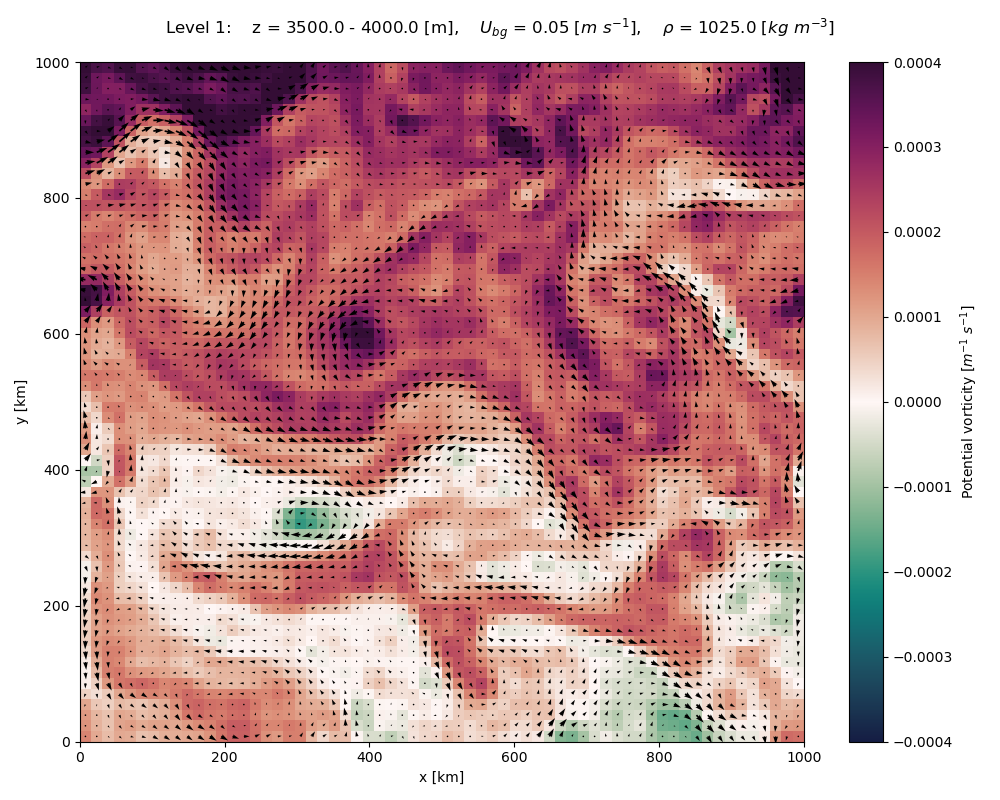

In [91]:
fig = plt.figure(figsize=(10,8), tight_layout=True)
ax=plt.axes()
fig.suptitle(fr'Level 1:    z = {H2+H3} - {H1+H2+H3} [m],    $U_{{bg}}$ = {U1} [$m~s^{{{-1}}}$],    $\rho$ = {rho1} [$kg~m^{{{-3}}}$]')
cmap=copy(plt.get_cmap('cmo.curl'))
f = 1
t=0
pc=ax.pcolormesh(xmesh, ymesh, PV[t,0], shading='auto', cmap=cmap, vmin=-4e-4, vmax=4e-4)

qv = ax.quiver(xmesh[::f,::f], ymesh[::f,::f], u_t[t,0,::f,::f], v_t[t,0,::f,::f], scale=65)

ax.set_xlabel('x [km]')
ax.set_ylabel('y [km]')
cb=plt.colorbar(pc)
cb.set_label(r'Potential vorticity [$m^{-1}~s^{-1}$]')

def animate(t):
    pc.set_array(PV[t,0].ravel())
    qv.set_UVC(u_t[t,0,::f,::f].ravel(), v_t[t,0,::f,::f].ravel())
    
    return pc, qv,

anim = FuncAnimation(fig, animate, frames = u_t.shape[0], blit=True)
writergif = PillowWriter(fps=5, codec="libx264")
anim.save(anim_dir+'level1.gif', writer=writergif)

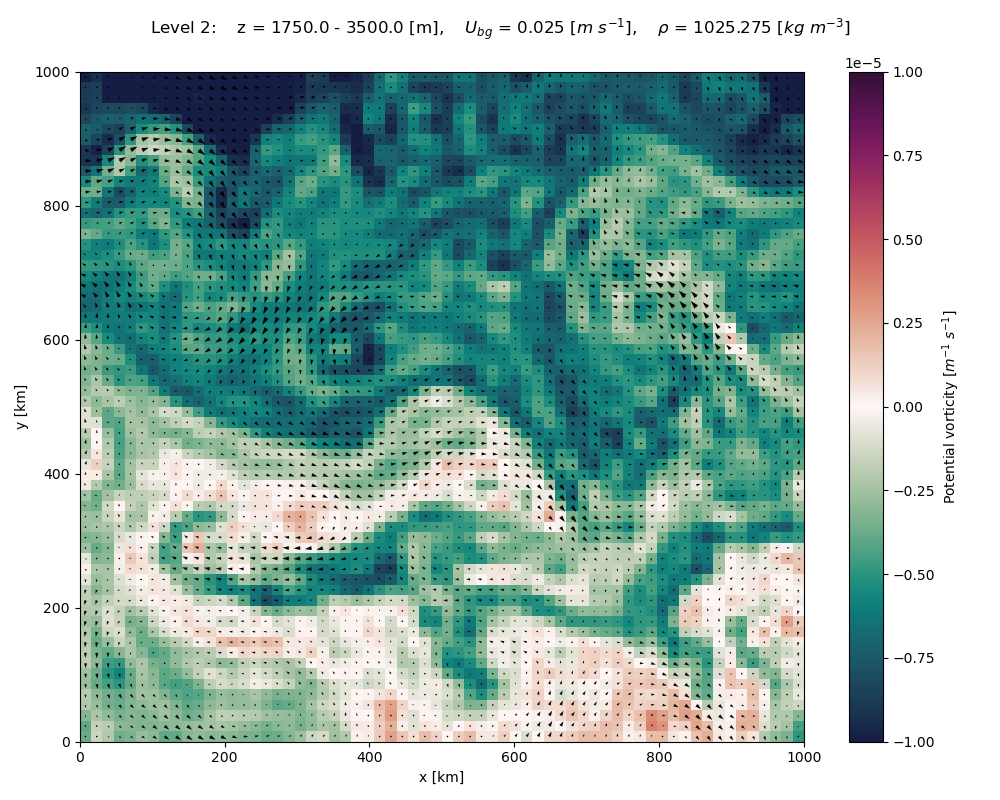

In [93]:
fig = plt.figure(figsize=(10,8), tight_layout=True)
ax=plt.axes()
fig.suptitle(fr'Level 2:    z = {H3} - {H2+H3} [m],    $U_{{bg}}$ = {U2} [$m~s^{{{-1}}}$],    $\rho$ = {rho2} [$kg~m^{{{-3}}}$]')

cmap=copy(plt.get_cmap('cmo.curl'))
f = 1
t=0
pc=ax.pcolormesh(xmesh, ymesh, PV[t,1], shading='auto', cmap=cmap, vmin=-1e-5, vmax=1e-5)

qv = ax.quiver(xmesh[::f,::f], ymesh[::f,::f], u_t[t,1,::f,::f], v_t[t,1,::f,::f], scale=65)

ax.set_xlabel('x [km]')
ax.set_ylabel('y [km]')
cb=plt.colorbar(pc)
cb.set_label(r'Potential vorticity [$m^{-1}~s^{-1}$]')

def animate(t):
    pc.set_array(PV[t,1].ravel())
    qv.set_UVC(u_t[t,1,::f,::f].ravel(), v_t[t,1,::f,::f].ravel())
    
    return pc, qv,

anim = FuncAnimation(fig, animate, frames = u_t.shape[0], blit=True)
writergif = PillowWriter(fps=5, codec="libx264")
anim.save(anim_dir+'level2.gif', writer=writergif)

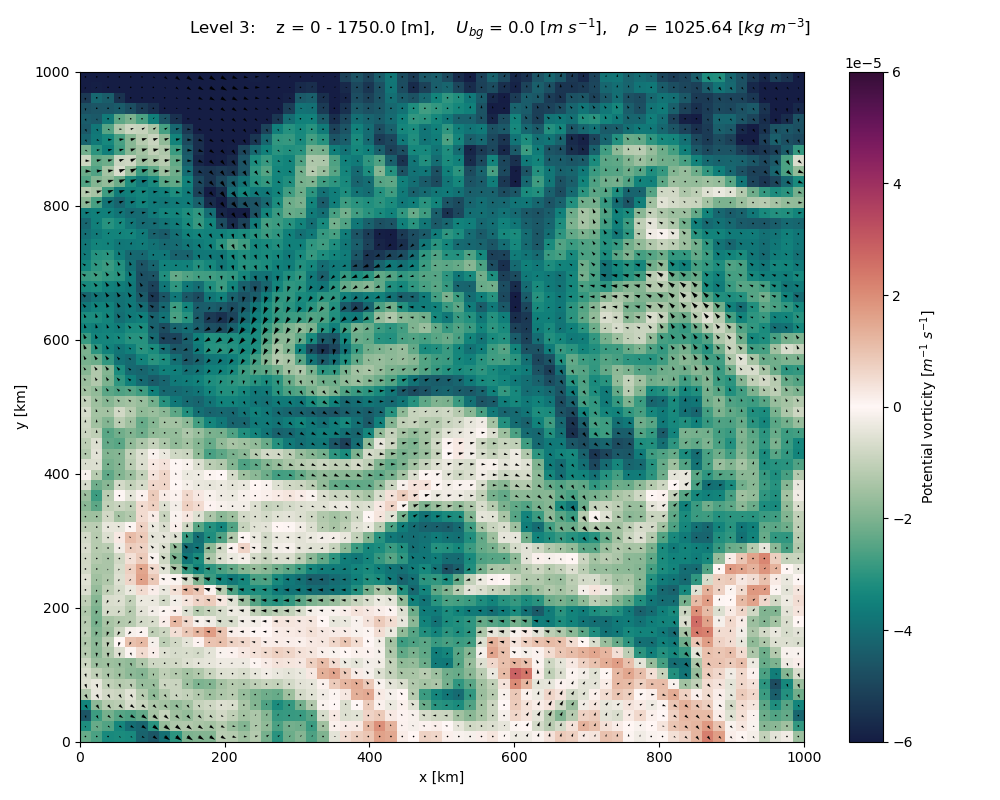

In [94]:
fig = plt.figure(figsize=(10,8), tight_layout=True)
ax=plt.axes()
fig.suptitle(fr'Level 3:    z = {0} - {H3} [m],    $U_{{bg}}$ = {U3} [$m~s^{{{-1}}}$],    $\rho$ = {rho3} [$kg~m^{{{-3}}}$]')

cmap=copy(plt.get_cmap('cmo.curl'))
f = 1
t=0
pc=ax.pcolormesh(xmesh, ymesh, PV[t,2], shading='auto', cmap=cmap, vmin=-6e-5, vmax=6e-5)

qv = ax.quiver(xmesh[::f,::f], ymesh[::f,::f], u_t[t,2,::f,::f], v_t[t,2,::f,::f], scale=65)

ax.set_xlabel('x [km]')
ax.set_ylabel('y [km]')
cb=plt.colorbar(pc)
cb.set_label(r'Potential vorticity [$m^{-1}~s^{-1}$]')

def animate(t):
    pc.set_array(PV[t,2].ravel())
    qv.set_UVC(u_t[t,2,::f,::f].ravel(), v_t[t,2,::f,::f].ravel())
    
    return pc, qv,

anim = FuncAnimation(fig, animate, frames = u_t.shape[0], blit=True)
writergif = PillowWriter(fps=5, codec="libx264")
anim.save(anim_dir+'level3.gif', writer=writergif)

In [107]:
dir(ax3)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_clipon',
 '_clippath',
 '_colorbars',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_axis_map',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',

Text(0, 0.5, 'PV [$m^{-1}~s^{-1}$]')

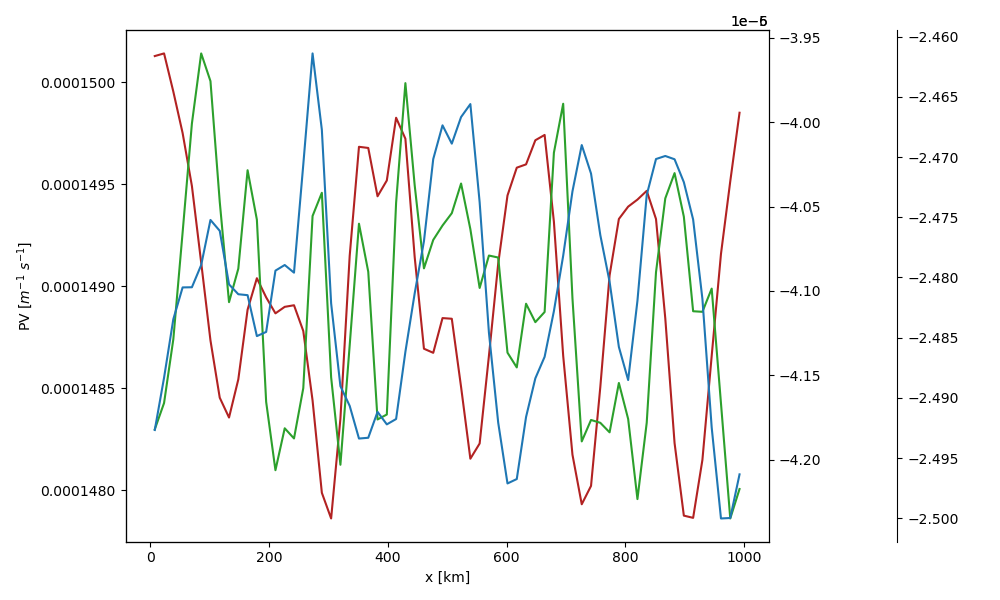

In [108]:
iy=31
it=30

fig = plt.figure(figsize=(10,6),tight_layout=True)
ax1 = plt.axes()
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# offset = 40
# new_fixed_axis = ax3.get_grid_helper().new_fixed_axis
# ax3.axis["right"] = new_fixed_axis(loc="right",
#                                     axes=ax3,
#                                     offset=(0, -offset))

# move the spine of the second axes outwards
ax3.spines["right"].set_position(("axes", 1.2))

ax1.plot(xmesh[iy,:],PV[it,0,iy,:], color='firebrick', label='Level 1')
ax2.plot(xmesh[iy,:],PV[it,1,iy,:], color='tab:green', label='Level 2')
ax3.plot(xmesh[iy,:],PV[it,2,iy,:], color='tab:blue', label='Level 3')

ax1.set_xlabel('x [km]')
ax1.set_ylabel(r'PV [$m^{-1}~s^{-1}$]')

# ax1.legend()
# plt.show()

In [95]:
plt.close('all')

In [32]:
u_t[-1,2,::f,::f]

array([[0.28705391, 0.32566471, 0.29757992, ..., 0.18163054, 0.19319697,
        0.22205537],
       [0.37583499, 0.32142885, 0.27682429, ..., 0.30388972, 0.34761032,
        0.38010863],
       [0.46115456, 0.40014271, 0.37692992, ..., 0.35949448, 0.43548011,
        0.48293518],
       ...,
       [0.35917214, 0.27171611, 0.25637734, ..., 0.39758064, 0.38659315,
        0.40233548],
       [0.26211525, 0.24771583, 0.30036013, ..., 0.3990977 , 0.38356765,
        0.33178159],
       [0.23897933, 0.30743304, 0.34536214, ..., 0.27277871, 0.25465592,
        0.22151587]])

In [522]:
print(f"The first baroclinic deformation radius is {m_ds.attrs['pyqg:radii'][1]/1.e3} km")
print(f"The second baroclinic deformation radius is {m_ds.attrs['pyqg:radii'][2]/1.e3} km")

The first baroclinic deformation radius is 15.375382785987185 km
The second baroclinic deformation radius is 7.975516271996243 km


/var/folders/hh/2wq7ys4544ngb10v0y46_f_h0000gr/T/ipykernel_29162/2220945349.py:10: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(pc)


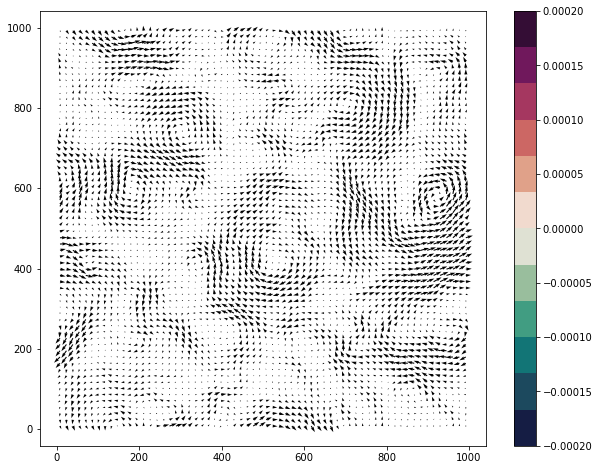

In [482]:
fig = plt.figure(figsize=(10,8))
ax=plt.axes()
f = 1
t=100
pv = m_ds.q + m_ds.Qy*m_ds.y
# pc=ax.pcolormesh(xmesh, ymesh, pv.isel(lev=0,time=0), shading='auto', cmap=cmap, vmin=-2e-4, vmax=2e-4)

qv = ax.quiver(xmesh[::f,::f], ymesh[::f,::f], m_ds.ufull.isel(lev=0,time=0)[::f,::f], m_ds.vfull.isel(lev=0,time=0)[::f,::f])

plt.colorbar(pc)

/var/folders/hh/2wq7ys4544ngb10v0y46_f_h0000gr/T/ipykernel_29162/4209447179.py:10: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(pc)


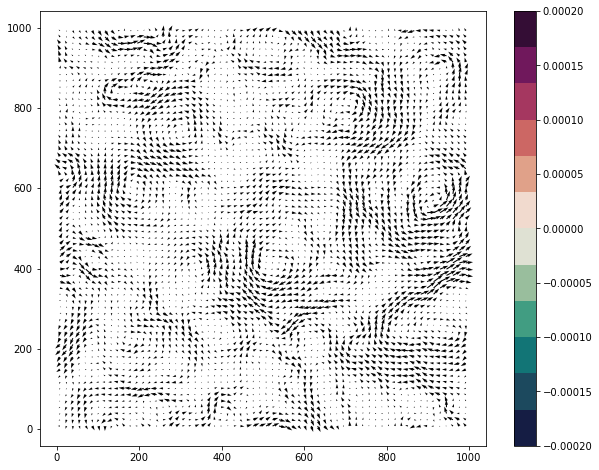

In [483]:
fig = plt.figure(figsize=(10,8))
ax=plt.axes()
f = 1
t=100
pv = m_ds.q + m_ds.Qy*m_ds.y
# pc=ax.pcolormesh(xmesh, ymesh, pv.isel(lev=0,time=0), shading='auto', cmap=cmap, vmin=-2e-4, vmax=2e-4)

qv = ax.quiver(xmesh[::f,::f], ymesh[::f,::f], m_ds.ufull.isel(lev=1,time=0)[::f,::f], m_ds.vfull.isel(lev=1,time=0)[::f,::f])

plt.colorbar(pc)